### Download Data

In [1]:
!kaggle datasets download -d gpreda/chinese-mnist -p data/downloaded --unzip

 91%|██████████████████████████████████▌   | 15.0M/16.5M [00:02<00:00, 13.8MB/s]
100%|██████████████████████████████████████| 16.5M/16.5M [00:02<00:00, 7.35MB/s]


### Setup Dataset

In [1]:
from text_recognizer.data import cmnist, base_data_module
import wandb,random
import torch

data = cmnist.CMNIST(base_data_module.BaseDataModule) 
data.prepare_data()  
data.setup()  # create torch.utils.data.Datasets, do train/val split

xs, ys = next(iter(data.train_dataloader()))


5


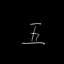

In [3]:
idx = random.randint(0, len(xs) - 1)

print(data.mapping[ys[idx]])
wandb.Image(xs[idx]).image

### Training

#### offline

In [ ]:
gpus = int(torch.cuda.is_available())  # use GPUs if they're available

%run training/run_experiment.py --model_class CNN --data_class CMNIST --gpus {gpus} --max_epochs=3

#### online

In [5]:
wandb.login(key='e1d18ed4e69d69c72e7942deff7b27d48ab031fc')

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: keriyu. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/kerunyu/.netrc


True

In [ ]:
%run training/run_experiment.py --model_class CNN --data_class CMNIST --gpus {gpus} --max_epochs=3 \
  --log_every_n_steps 10 --wandb --project_name "chinese-mnist-recognizer"
last_expt = wandb.run

wandb.finish() 